# CAP 5768 - Data Science - Dr. Marques - Fall 2019

## FINAL PROJECT
## Starter code

### Goals 

- To learn how to implement a Data Science / Machine Learning workflow in Python (using Pandas, Scikit-learn, Matplotlib, and Numpy)
- To get acquainted with representative datasets and problems in data science and machine learning
- To learn how to implement several different machine learning models in Python 
- To learn how to evaluate and fine-tune the performance of a model using cross-validation
- To learn how to test a model and produce a set of plots and performance measures

### Instructions

- This assignment is structured in 3 parts.
- As usual, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 195 (plus up to 100 bonus points).

### Important

- For the sake of reproducibility, use `random_state=0` (or equivalent) in all functions that use random number generation.
- It is OK to attempt the bonus points, but please **do not overdo it!** 

In [406]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns; sns.set()
import scipy.stats as ss
sns.set()

%matplotlib inline

-------------------
## Part 1: Decision trees

In this part, we will take another look at the Iris dataset.

The Python code below will load a dataset containing information about three types of Iris flowers that had the size of its petals and sepals carefully measured.

The Fisher’s Iris dataset contains 150 observations with 4 features each: 
- sepal length in cm; 
- sepal width in cm; 
- petal length in cm; and 
- petal width in cm. 

The class for each instance is stored in a separate column called “species”. In this case, the first 50 instances belong to class Setosa, the following 50 belong to class Versicolor and the last 50 belong to class Virginica.

See:
https://archive.ics.uci.edu/ml/datasets/Iris for additional information.

In [407]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1.1 Your turn! (25 points)

Write code to: 

1. Display the pair plots for all (4) attributes for all (3) categories/species/classes in the Iris dataset. (15 pts)
2. Compute relevant summary statistics for each species. (10 pts)

## Solution

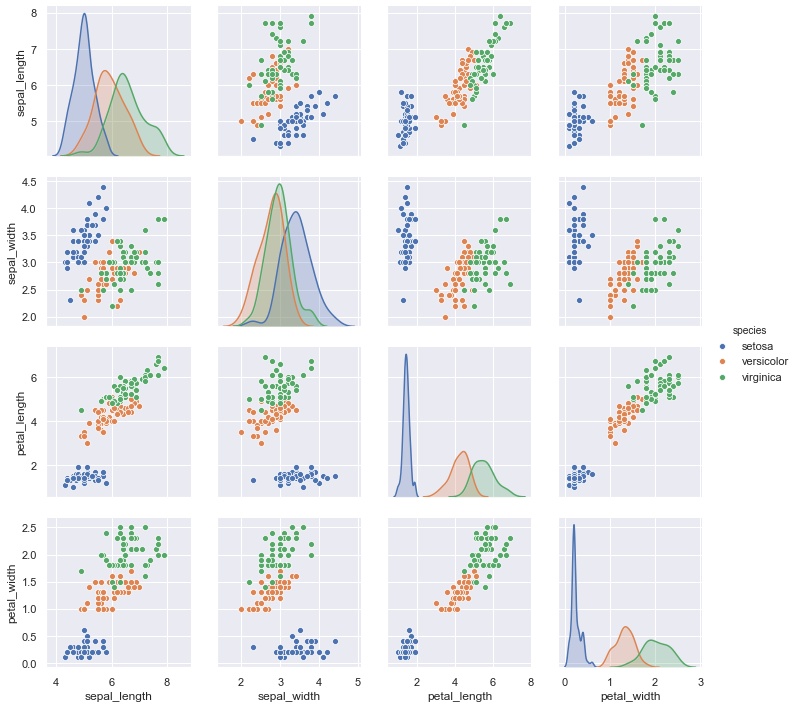

In [408]:
# 1. Display the pair plots for all (4) attributes for all (3) categories/species/classes in the Iris dataset.
# Display pair plot
sns.pairplot(iris, hue='species', height=2.5);

In [409]:
# 2. Compute relevant summary statistics for each species. 
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 1.2 Your turn! (35 points)

Write code to: 

1. Build a decision tree classifier using scikit-learn's `DecisionTreeClassifier` (using the default options). Check documentation at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html (10 pts)
2. Plot the resulting decision tree. It should look similar to the plot below. (15 pts)
(Note: if `graphviz` gives you headaches, a text-based 'plot'-- using `export_text` -- should be OK.)
3. Perform k-fold cross-validation using k=3 and display the results. (10 pts)

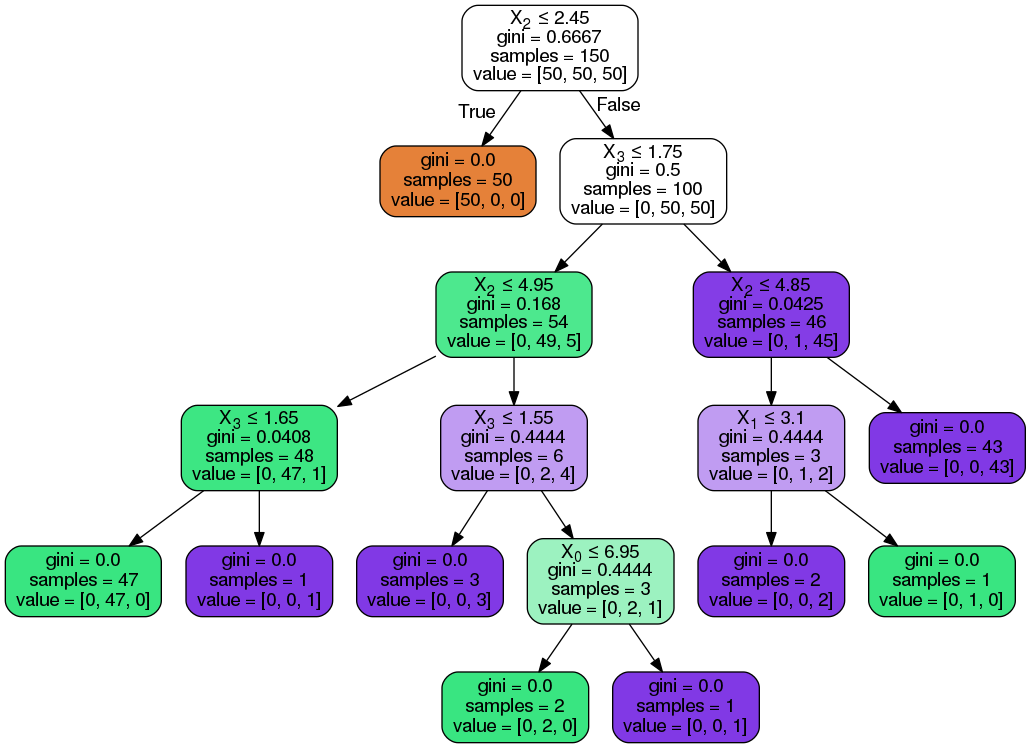

## Solution

In [412]:
# 1. Build a decision tree classifier using scikit-learn's

#Import the data and classifier
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()

#Load the Data
import sklearn.datasets as datasets
import pandas as pd
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

#Fit the Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
decision_tree= dtree.fit(df,y)

In [413]:
# 2. Plot the resulting decision tree. It should look similar to the plot below.

from sklearn.tree.export import export_text

r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

r = export_text(decision_tree, feature_names=iris['feature_names'],
                decimals=0, show_weights=True)
print(r)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2

|--- petal length (cm) <= 2
|   |--- weights: [50, 0, 0] class: 0
|--- petal length (cm) >  2
|   |--- 

In [414]:
# 3. Perform k-fold cross-validation using k=3 and display the results.

scores= cross_val_score(clf, iris.data, iris.target, cv=3)
print ("Cross Validation Score:", scores)
print ("Mean Cross Validation Score:", scores.mean())

Cross Validation Score: [0.98039216 0.92156863 1.        ]
Mean Cross Validation Score: 0.9673202614379085


## Bonus opportunity 1 (15 points)

Make meaningful changes to the baseline code, e.g., trying different combinations of functions to measure the quality of a split, limiting the maximum depth of the tree, etc. 

Publish the code, the results, and comment on how they differ from the baseline (and your intuition as to *why* they do).

## Solution

In [418]:
X=pd.DataFrame(iris.data, columns=iris.feature_names)
Y=iris.target

dtree= DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=30,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

decision_tree= dtree.fit(X,Y)

# Split the Trainning and Testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=6)

# check classification accuracy of KNN with K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9473684210526315

-------------------
## Part 2: Digit classification

The MNIST handwritten digit dataset consists of a training set of 60,000 examples, and a test set of 10,000 examples. Each image in the dataset has 28$\times$28 pixels. They are saved in the csv data files `mnist_train.csv` and `mnist_test.csv`. 

Every line of these files consists of a grayscale image and its label, i.e. 785 numbers between 0 and 255:
- The first number of each line is the label, i.e. the digit which is depicted in the image. 
- The following 784 numbers are the pixels of the 28 $\times$ 28 image.

The Python code below loads the images from CSV files, normalizes them (i.e., maps the intensity values from [0..255] to [0..1]), and displays a few images from the training set.

In [419]:
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

train_data = np.loadtxt("mnist_train.csv", 
                       delimiter=",")
test_data = np.loadtxt("mnist_test.csv", 
                       delimiter=",") 

In [420]:
test_data.shape

(10000, 785)

In [421]:
train_data.shape

(60000, 785)

In [422]:
train_imgs = np.asfarray(train_data[:, 1:])/255.0
test_imgs = np.asfarray(test_data[:, 1:])/255.0
train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])

In [425]:
train_imgs.shape

(60000, 784)

In [426]:
test_imgs.shape

(10000, 784)

In [427]:
train_labels.shape

(60000, 1)

In [428]:
test_labels.shape

(10000, 1)

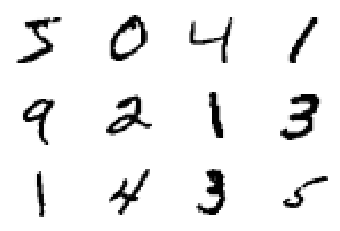

In [429]:
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(train_imgs[i].reshape((28,28)), cmap="Greys")
    axi.set(xticks=[], yticks=[])

## 2.1 Your turn! (20 points)

Write code to: 

1. Build and fit a 10-class Naive Bayes classifier using scikit-learn's `MultinomialNB()` with default options and using the raw pixel values as features. (5 pts)
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. (15 pts)

Hint: your accuracy will be around 83.5%

## Solution

In [449]:
# 1. Build and fit a 10-class Naive Bayes classifier using scikit-learn's

from sklearn.naive_bayes import MultinomialNB

#Create a Gaussian Classifier
model = MultinomialNB()

#Train the model using the training sets
model.fit(train_imgs,train_labels);

#Predict the response for test dataset
y_pred = model.predict(test_imgs)

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93       980
         1.0       0.91      0.93      0.92      1135
         2.0       0.90      0.83      0.86      1032
         3.0       0.80      0.84      0.82      1010
         4.0       0.84      0.74      0.79       982
         5.0       0.87      0.66      0.75       892
         6.0       0.89      0.90      0.89       958
         7.0       0.93      0.84      0.88      1028
         8.0       0.66      0.80      0.72       974
         9.0       0.71      0.85      0.77      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.84      0.84     10000

Sum Axis-1 as Classification accuracy: 0.8357


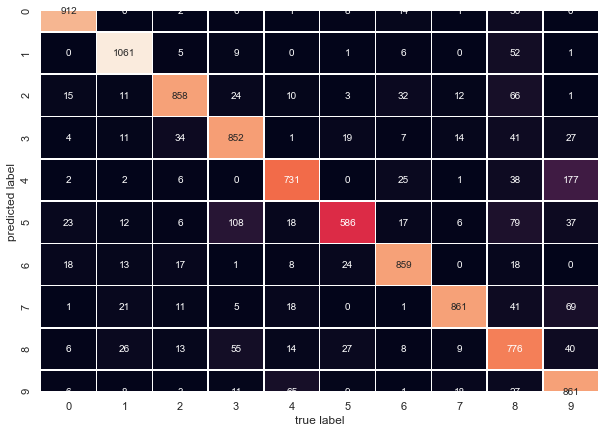

In [450]:
# 2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix.

from sklearn import metrics
print(metrics.classification_report(test_labels, y_pred))

def draw_confusionmatrix(test_labels, y_pred):
    plt.figure(figsize=(10,7))
    cm = confusion_matrix(test_labels, y_pred)
    ax = sns.heatmap(cm, annot=True, fmt="d",cbar=False, linewidths=0.5)
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    acc = metrics.accuracy_score(test_labels, y_pred)
    print(f"Sum Axis-1 as Classification accuracy: {acc}")

draw_confusionmatrix(test_labels, y_pred)

## 2.2 Your turn! (20 points)

Write code to: 

1. Build and fit a 10-class Random Forests classifier using scikit-learn's `RandomForestClassifier()` with default options (don't forget `random_state=0`) and using the raw pixel values as features. (5 pts)
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. (15 pts)

Hint: your accuracy should be > 90%

## Solution

In [434]:
# 1. Build and fit a 10-class Random Forests classifier using scikit-learn's 

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
#Train the model using the training sets
model.fit(train_imgs,train_labels);

#Predict the response for test dataset
y_pred_rf = model.predict(test_imgs)

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       980
         1.0       0.98      0.99      0.98      1135
         2.0       0.93      0.95      0.94      1032
         3.0       0.92      0.95      0.93      1010
         4.0       0.94      0.95      0.95       982
         5.0       0.94      0.91      0.92       892
         6.0       0.96      0.96      0.96       958
         7.0       0.96      0.94      0.95      1028
         8.0       0.94      0.91      0.92       974
         9.0       0.94      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



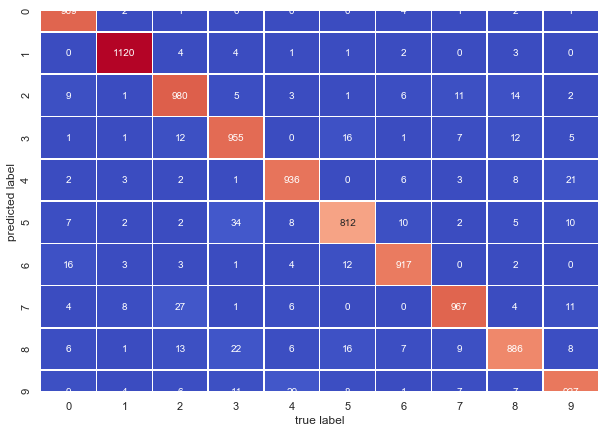

In [436]:
# 2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix.

from sklearn import metrics
from sklearn.metrics import confusion_matrix

print(metrics.classification_report(test_labels, y_pred_rf))

plt.figure(figsize=(10, 7))
cm = confusion_matrix(test_labels, y_pred_rf)
ax = sns.heatmap(cm, annot=True, fmt="d",cbar=False,cmap="coolwarm", linewidths=0.5)
plt.xlabel('true label')
plt.ylabel('predicted label');

## 2.3 Your turn! (20 points)

Write code to: 

1. Build and fit a 10-class classifier of your choice, with sensible initialization options, and using the raw pixel values as features. (5 pts)
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. (15 pts)

Hint: A variation of the Random Forests classifier from 2.2 above is acceptable. In that case, document your selection of (hyper)parameters and your rationale for choosing them.

## Solution

In [437]:
# 1. Build and fit a 10-class classifier of your choice, with sensible initialization options, 
#    and using the raw pixel values as features.

#Using Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(train_imgs,train_labels)
y_pred_knn = clf_knn.predict(test_imgs)
acc_knn = metrics.accuracy_score(test_labels, y_pred_knn)

nearest neighbors accuracy:  0.9688


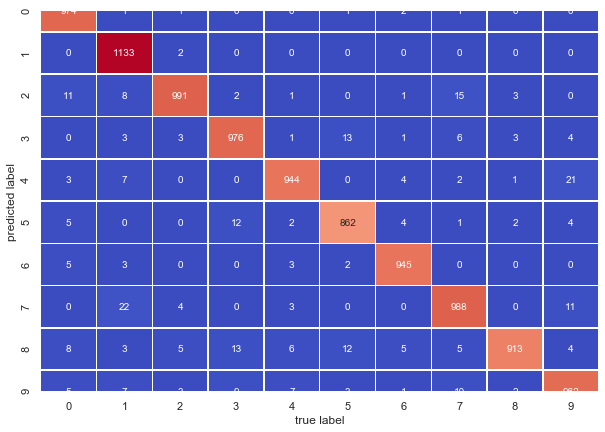

In [438]:
# 2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix.

from sklearn.metrics import confusion_matrix
from sklearn import metrics

acc_knn = metrics.accuracy_score(test_labels, y_pred_knn)
print ("nearest neighbors accuracy: ",acc_knn)

plt.figure(figsize=(10, 7))
cm1 = confusion_matrix(test_labels, y_pred_knn)
ax1 = sns.heatmap(cm1, annot=True, fmt="d",cbar=False,cmap="coolwarm", linewidths=0.5)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [439]:
# 1. Build and fit a 10-class classifier of your choice, with sensible initialization options, 
# and using the raw pixel values as features.

#Using Linear Support Vector Machine
from sklearn.svm import LinearSVC
clf_svm = LinearSVC()
clf_svm.fit(train_imgs,train_labels)
y_pred_svm = clf_svm.predict(test_imgs)
acc_svm = metrics.accuracy_score(test_labels, y_pred_svm)

In [440]:
# 2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix.

print ("Linear SVM accuracy: ",acc_svm)

print("Classification report for classifier %s:\n%s\n"
      % (clf_svm, metrics.classification_report(test_labels,  y_pred_knn)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_labels,  y_pred_knn))

Linear SVM accuracy:  0.9182
Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0):
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       980
         1.0       0.95      1.00      0.98      1135
         2.0       0.98      0.96      0.97      1032
         3.0       0.96      0.97      0.97      1010
         4.0       0.98      0.96      0.97       982
         5.0       0.97      0.97      0.97       892
         6.0       0.98      0.99      0.98       958
         7.0       0.96      0.96      0.96      1028
         8.0       0.99      0.94      0.96       974
         9.0       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000

In [441]:
# 1. ild and fit a 10-class classifier of your choice, with sensible initialization options, 
# and using the raw pixel values as features.

#By Using SGD Classfier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
clf_sgd = SGDClassifier()
clf_sgd.fit(train_imgs,train_labels)
y_pred_sgd = clf_sgd.predict(test_imgs)
acc_sgd = accuracy_score(test_labels, y_pred_sgd)

In [442]:
# 2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix.

print ("stochastic gradient descent accuracy: ",acc_sgd)

print("Classification report for classifier %s:\n%s\n"
      % (clf_svm, metrics.classification_report(test_labels,  y_pred_sgd)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_labels,  y_pred_sgd))

stochastic gradient descent accuracy:  0.917
Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0):
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       980
         1.0       0.97      0.98      0.98      1135
         2.0       0.91      0.90      0.91      1032
         3.0       0.88      0.92      0.90      1010
         4.0       0.90      0.93      0.92       982
         5.0       0.90      0.83      0.86       892
         6.0       0.93      0.96      0.94       958
         7.0       0.90      0.94      0.92      1028
         8.0       0.90      0.85      0.87       974
         9.0       0.91      0.87      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92    

In [443]:
# 1. ild and fit a 10-class classifier of your choice, with sensible initialization options, 
# and using the raw pixel values as features.

# Radom Forest Classifier with different Optimization values of Parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf_rf = RandomForestClassifier(n_estimators=100, criterion='entropy' , max_depth=2, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features='log2', 
                                max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                min_impurity_split=None, bootstrap=True, oob_score=False, 
                                n_jobs=-1, random_state=None, verbose=10, 
                                warm_start=False, class_weight=None)
clf_rf.fit(train_imgs,train_labels)
y_pred_rf = clf_rf.predict(test_imgs)
acc_rf = accuracy_score(test_labels, y_pred_rf)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100building tree 3 of 100building tree 4 of 100



building tree 5 of 100building tree 6 of 100

building tree 7 of 100
building tree 8 of 100


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.8s


building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100

[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.9s



building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   11.2s



building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.4s



building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.7s


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100building tree 40 of 100

building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.9s


building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100building tree 54 of 100

building tree 55 of 100
building tree 56 of 100
building tree 57 of 100


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   12.3s


building tree 58 of 100building tree 59 of 100

building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100building tree 64 of 100

building tree 65 of 100
building tree 66 of 100
building tree 67 of 100


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.6s


building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100building tree 76 of 100

building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   13.0s


building tree 81 of 100

building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100building tree 92 of 100building tree 93 of 100




[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   13.4s


building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [444]:
# # 2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix.

print ("random forest accuracy: ",acc_rf)

print("Classification report for classifier %s:\n%s\n"
      % (clf_svm, metrics.classification_report(test_labels,  y_pred_rf)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_labels,  y_pred_rf))

random forest accuracy:  0.6837
Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0):
              precision    recall  f1-score   support

         0.0       0.65      0.98      0.78       980
         1.0       0.54      0.99      0.70      1135
         2.0       0.84      0.64      0.73      1032
         3.0       0.68      0.68      0.68      1010
         4.0       0.67      0.68      0.67       982
         5.0       0.98      0.14      0.24       892
         6.0       0.79      0.74      0.77       958
         7.0       0.72      0.84      0.78      1028
         8.0       0.91      0.47      0.62       974
         9.0       0.64      0.57      0.60      1009

    accuracy                           0.68     10000
   macro avg       0.74      0.67      0.66     10

Comparing the all 4 classifiers: Nearst Neighbours, Linear Support Vector Machine, SGD Classifier and Random Forest Classifier, the accuracy rate is lowest for Random Forest Classifier.

-------------------
## Part 3: Face Recognition 

In this part you will build a face recognition solution.

We will use a subset of the Labeled Faces in the Wild (LFW) people dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

The Python code below loads a dataset of 1867 images (resized to 62 $\times$ 47 pixels) from the dataset and displays some of them.

Hint: you will have to install Pillow for this part. See https://pillow.readthedocs.io/en/stable/

In [457]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=40)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Arnold Schwarzenegger' 'Colin Powell' 'Donald Rumsfeld'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Capriati'
 'John Ashcroft' 'Junichiro Koizumi' 'Laura Bush' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Silva' 'Serena Williams' 'Tony Blair'
 'Vladimir Putin']
(1867, 62, 47)


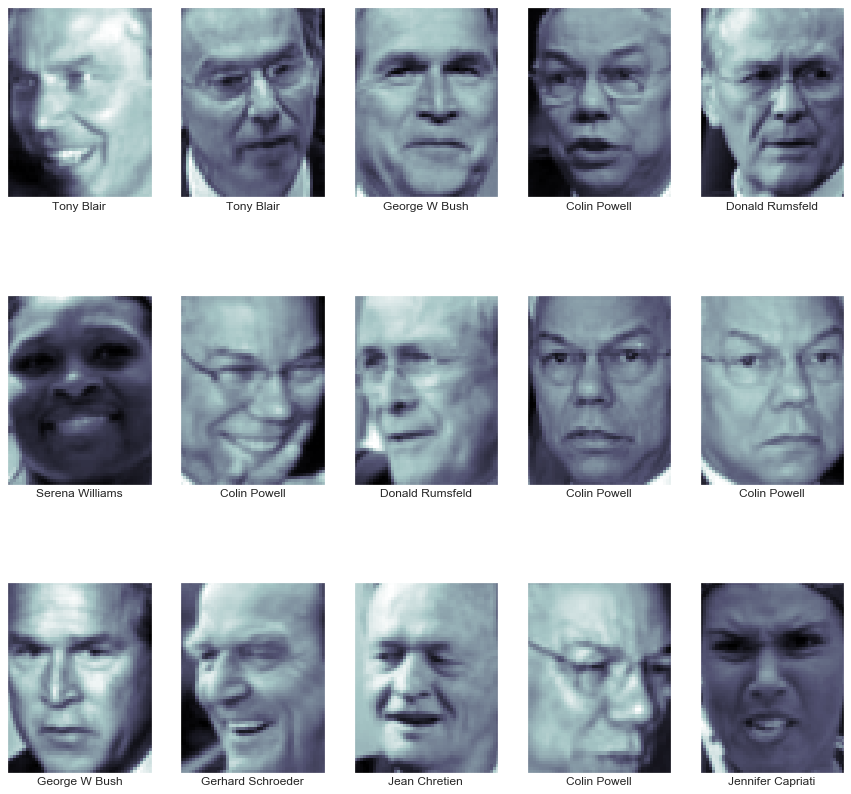

In [458]:
plt.rcParams["figure.figsize"]=15,15
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

## 3.1 Your turn! (55 points)

Write code to: 

1. Use Principal Component Analysis (PCA) to reduce the dimensionality of each face to the first 120 components. (10 pts)
2. Build and fit a multi-class SVM classifier, with sensible initialization options, and using the PCA-reduced  features. (10 pts)
3. Make predictions on the test data, compute the precision, recall and f1 score for each category, compute the overall accuracy, and plot the resulting confusing matrix. (25 pts)
4. Display examples of correct and incorrect predictions (at least 5 of each). (10 pts)

## Solution

Original number of features: 2914
Reduced number of features: 120


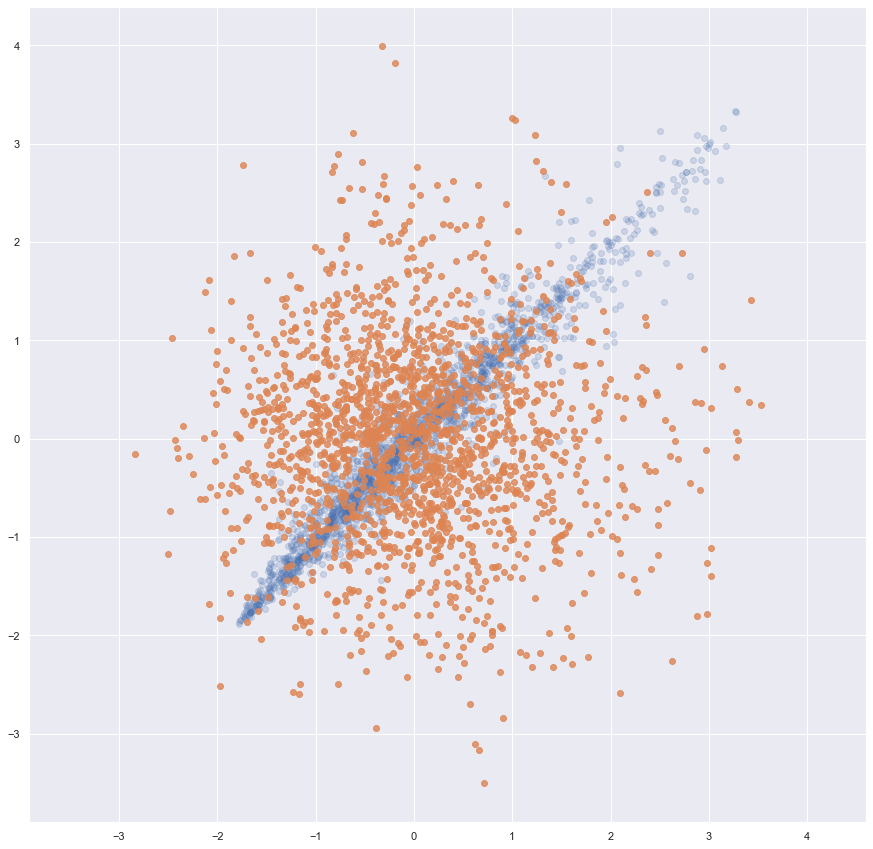

In [459]:
# 1. Use Principal Component Analysis (PCA) to reduce the dimensionality of each face to the first 120 components.

# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

# Standardize the feature matrix
X = StandardScaler().fit_transform(faces.data)

# Create a PCA that will of first 120 the variance
pca = PCA(n_components=120, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(X)

# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)
plt.axis('equal');

In [460]:
# 2. Build and fit a multi-class SVM classifier, with sensible initialization options, and using the PCA-reduced features.

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Split the data

X = lfw_dataset.data
y = lfw_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Model Fit
pca = PCA(n_components=0.99, whiten=True)
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
model = SVC(kernel='linear', C=1E10)
#clf = SVC()
#clf_svm = LinearSVC()
clf.fit(X_t_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

Prediction score: 0.43859649122807015
Individual Accuracy: 
                    precision    recall  f1-score   support

     Colin Powell       0.39      0.31      0.34        95
  Donald Rumsfeld       0.29      0.28      0.29        53
    George W Bush       0.57      0.66      0.62       199
Gerhard Schroeder       0.20      0.16      0.17        51
       Tony Blair       0.27      0.28      0.27        58

         accuracy                           0.44       456
        macro avg       0.34      0.34      0.34       456
     weighted avg       0.42      0.44      0.43       456

Overall Accuracy: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0):
              precision    recall  f1-score   support

           0       0.39      0.31      0.34        95
           1       0.29      0.28      0.29    

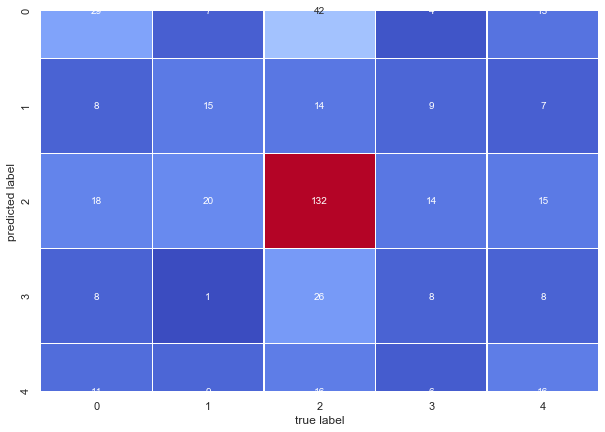

In [470]:
# 3. Make predictions on the test data, compute the precision, recall and f1 score for each category, 
#    compute the overall accuracy, and plot the resulting confusing matrix.

y_pred = clf.predict(X_t_test)

print ('Prediction score:', clf.score(X_t_test, y_test))

print('Individual Accuracy: \n' ,classification_report(y_test, y_pred, target_names=target_names))

print("Overall Accuracy: %s:\n%s\n"
      % (clf_svm, metrics.classification_report(y_test,  y_pred)))

plt.figure(figsize=(10, 7))
cm1 = confusion_matrix(y_test,  y_pred)
ax1 = sns.heatmap(cm1, annot=True, fmt="d",cbar=False,cmap="coolwarm", linewidths=0.5)
plt.xlabel('true label')
plt.ylabel('predicted label');

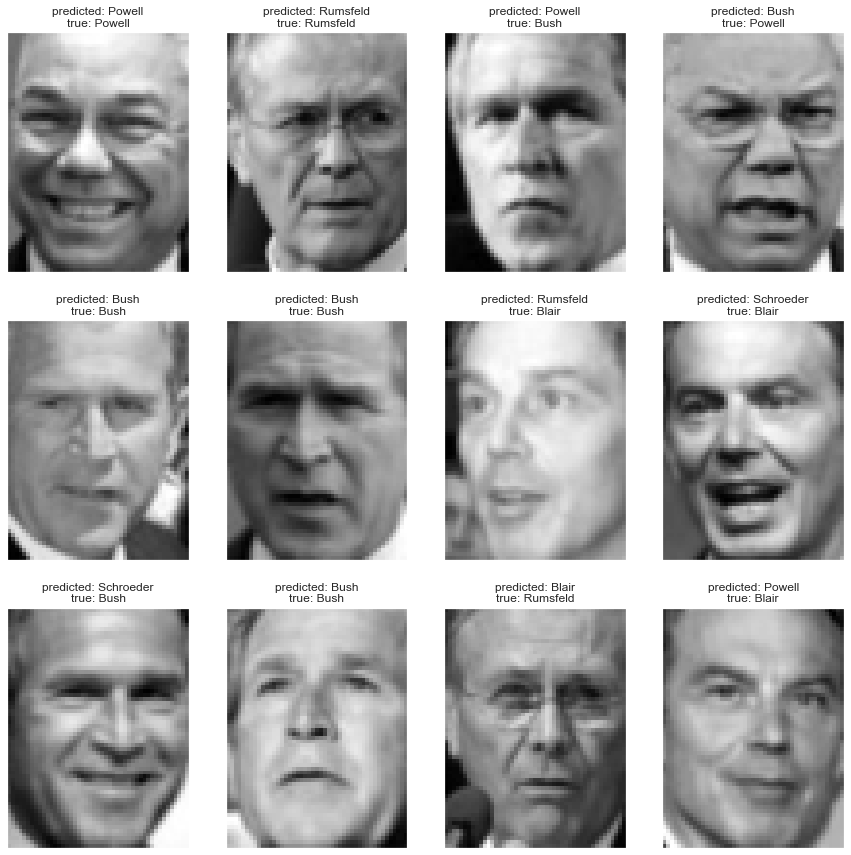

In [462]:
# 4. Display examples of correct and incorrect predictions

# Visualization
def plot_gallery(faces, titles, h, w, rows=3, cols=4):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(faces[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
 
def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]].split(' ')[-1]
        true_name = target_names[y_test[i]].split(' ')[-1]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)
 
prediction_titles = list(titles(y_pred, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)

## Bonus opportunity 2 (35 points)

Make meaningful changes to the baseline code, e.g.:

- trying different combinations of SVM parameters following a grid search cross-validation approach.
- experimenting with different values of number of components for the PCA and showing how much of the variance they explain (i.e., plotting the cumulative explained variance as a function of the number of components).
- using "data augmentation" to generate additional training images (for under-represented classes).

Publish the code, the results, and document your steps and the rationale behind them.

## Solution

In [463]:
# Different combinations of SVM parameters following a grid search cross-validation approach.
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

Wall time: 19.2 s
{'svc__C': 5, 'svc__gamma': 0.0005}


In [464]:
# Fit the Model
model = grid.best_estimator_
y_fit = model.predict(X_test)

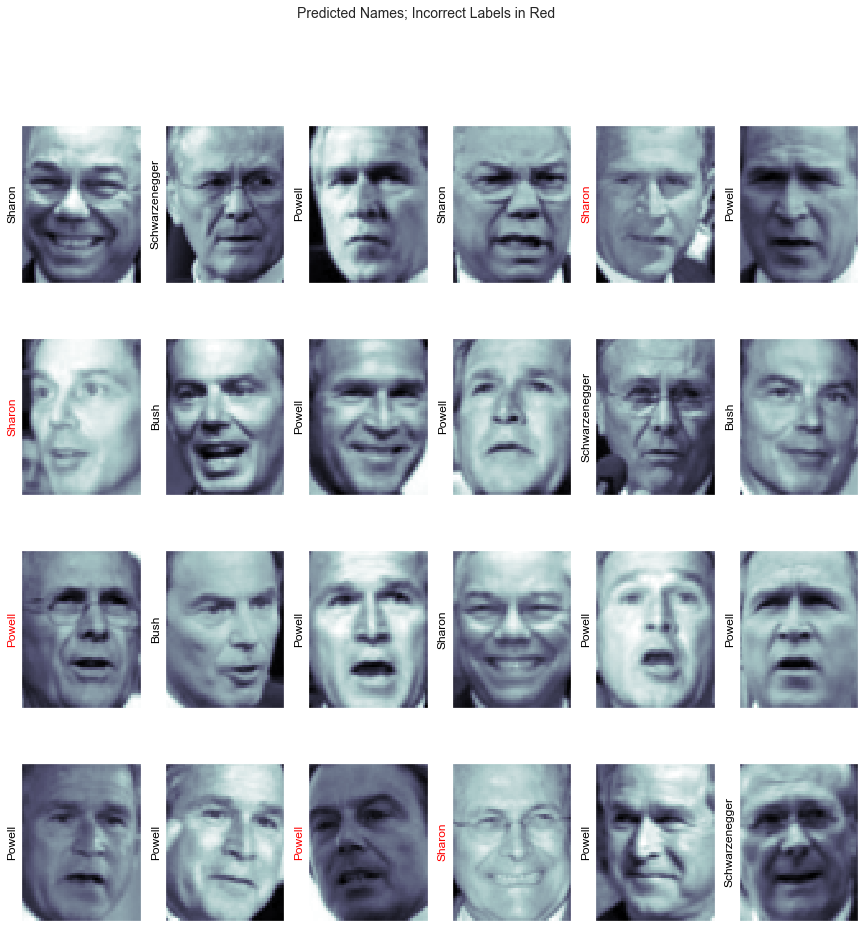

In [480]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_fit[i]].split()[-1],
                   color='black' if y_fit[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [481]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_fit,
                            target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.78      0.84      0.81        95
  Donald Rumsfeld       0.78      0.72      0.75        53
    George W Bush       0.90      0.88      0.89       199
Gerhard Schroeder       0.78      0.78      0.78        51
       Tony Blair       0.78      0.79      0.79        58

         accuracy                           0.83       456
        macro avg       0.80      0.80      0.80       456
     weighted avg       0.83      0.83      0.83       456



In [482]:
print('Confusion Matrix')
#Make a data frame so we can have some nice labels
cm = confusion_matrix(y_test, y_pred, labels=range(n_classes))
df = pd.DataFrame(cm, columns = faces.target_names, index = faces.target_names)
print(df)

Confusion Matrix
                           Ariel Sharon  Arnold Schwarzenegger  Colin Powell  \
Ariel Sharon                         29                      7            42   
Arnold Schwarzenegger                 8                     15            14   
Colin Powell                         18                     20           132   
Donald Rumsfeld                       8                      1            26   
George W Bush                        11                      9            16   
Gerhard Schroeder                     0                      0             0   
Gloria Macapagal Arroyo               0                      0             0   
Hugo Chavez                           0                      0             0   
Jacques Chirac                        0                      0             0   
Jean Chretien                         0                      0             0   
Jennifer Capriati                     0                      0             0   
John Ashcroft          

Vladimir Putin                           0           0               0  


## Bonus opportunity 3 (50 points)

Write code to incorporate face detection capabilities (see "Face Detection Pipeline" in the textbook), improve it to include non-maximal suppression (to produce 'clean' detection results) and demonstrate how it can be used to:
- load an image that the model has never seen before (e.g. an image you downloaded from the Internet)
- locate (i.e. detect) the face in the image
- resize the face region to 62 $\times$ 47 pixels
- run the face recognition code you wrote above and produce a message showing the closest 'celebrity' from the dataset.

Publish the code, the results, and document your steps and the rationale behind them.

## Solution

In [483]:
#Import Necessary function
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()
positive_patches = faces.images
positive_patches.shape

(13233, 62, 47)

In [484]:
#  Obtain a set of negative training samples

from skimage import data, transform

imgs_to_use = ['camera', 'text', 'coins', 'moon',
               'page', 'clock', 'immunohistochemistry',
               'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)())
          for name in imgs_to_use]

In [485]:
# Extract Patches

from sklearn.feature_extraction.image import PatchExtractor

def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
                               max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size)
                            for patch in patches])
    return patches

negative_patches = np.vstack([extract_patches(im, 1000, scale)
                              for im in images for scale in [0.5, 1.0, 2.0]])
negative_patches.shape

(30000, 62, 47)

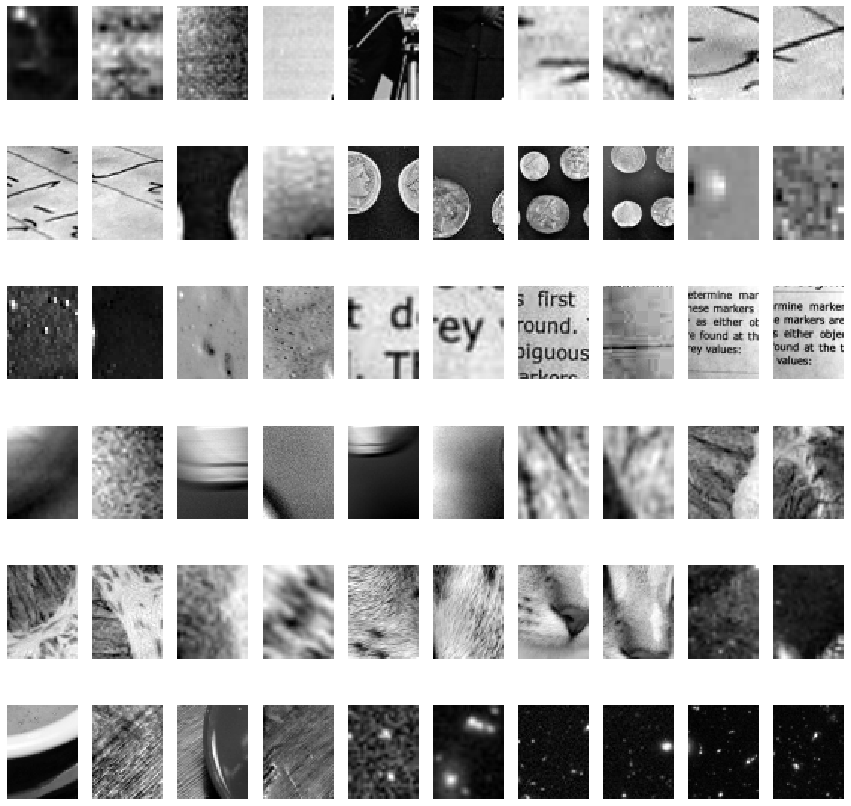

In [486]:
# Image patches which do not contain faces (Train with Negetive data).

fig, ax = plt.subplots(6, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[500 * i], cmap='gray')
    axi.axis('off')

In [487]:
# Combine sets and extract HOG features

from itertools import chain
X_train = np.array([feature.hog(im)
                    for im in chain(positive_patches,
                                    negative_patches)])
y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] = 1

In [488]:
# Training a support vector machine

from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(X_train, y_train)
grid.best_score_

0.9891286748548562

In [489]:
#Fit the model
model = grid.best_estimator_
model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

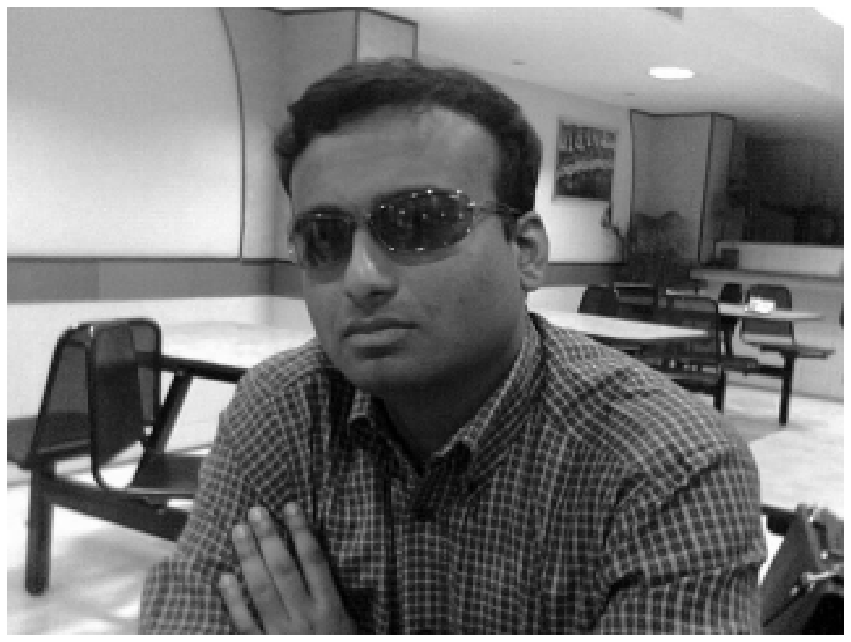

In [490]:
# Improting Image class from PIL module  
from PIL import Image  
from matplotlib import image
from numpy import asarray
from skimage.color import rgb2gray
#test_image = skimage.data.astronaut()
#test_image = skimage.color.rgb2gray(test_image)
#test_image = skimage.transform.rescale(test_image, 0.5)
#test_image = test_image[:160, 40:180]

image = Image.open('Debarshi.jpg')
test_image = asarray(image)
test_image = skimage.color.rgb2gray(test_image)
test_image = transform.rescale(test_image, 0.5)
#test_image = test_image[:160, 40:180]

plt.imshow(test_image, cmap='gray')
plt.axis('off');

In [491]:
# Create a window that iterates over patches of this image, and compute HOG features for each patch:

def sliding_window(img, patch_size=positive_patches[0].shape,
                   istep=2, jstep=2, scale=1.0):
    Ni, Nj = (int(scale * s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i + Ni, j:j + Nj]
            if scale != 1:
                patch = transform.resize(patch, patch_size)
            yield (i, j), patch
            
indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([feature.hog(patch) for patch in patches])
patches_hog.shape

(11481, 1215)

In [492]:
# HOG-featured patches and use our model to evaluate whether each patch contains a face.

labels = model.predict(patches_hog)
labels.sum()

78.0

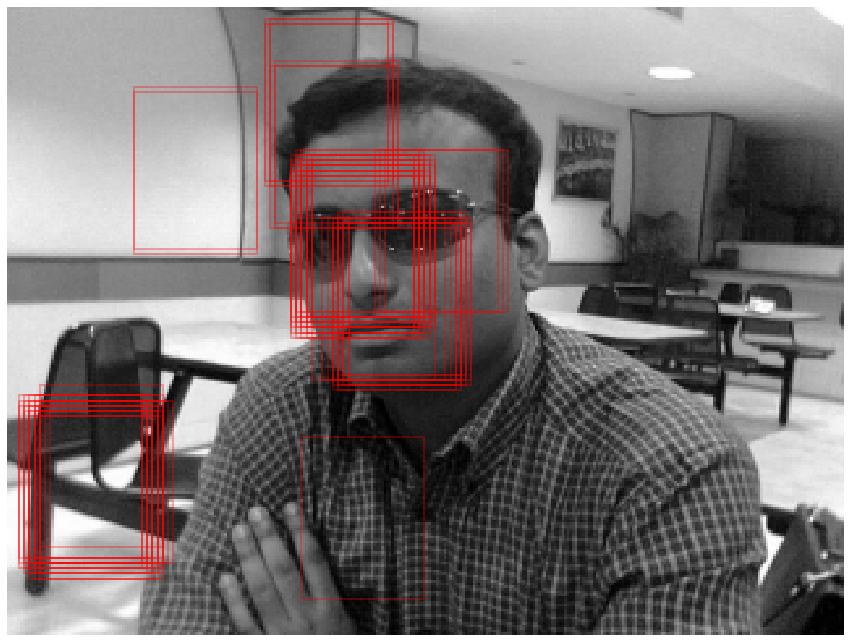

In [493]:
# Among nearly 2,000 patches, found 30 detections. 

fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')

Ni, Nj = positive_patches[0].shape
indices = np.array(indices)

for i, j in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='red',
                               alpha=0.3, lw=2, facecolor='none'))

## Conclusions (20 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

## Solution

What have you learned from this assignment? I have learned from this assignment that how to perform and compare the accuracy of different classifiers, PCA, and pipeline are great tools. Grid search and face ditection are real fun. 
Which parts were the most fun, time-consuming, enlightening, tedious? I felt that data augmentation part is time consuming and I am still unable to do this. I am still confused that how to use data augmentation while we are fetching the data. We might downloads the data for doing this.
What would you do if you had an additional week to work on this? If I would get another week, I would have done this assignment in many ways.